In [11]:
import numpy as np
import pandas as pd

ncd_df = pd.read_csv("results/ncd_costs.csv", names=["study", "notation", "from_slug", "to_slug", "a", "b", "ab"])
ncd_df["cd"] = ncd_df["ab"] - ncd_df[["a", "b"]].min(axis=1)
ncd_df["ncd"] = (1000 * ncd_df["cd"] / ncd_df[["a", "b"]].max(axis=1))

In [12]:
ggplot = ncd_df.query("study=='basic' and notation=='ggplot2'")[["from_slug", "to_slug", "ncd"]]

In [13]:
px = ncd_df.query("study=='basic' and notation=='plotly_express'")[["from_slug", "to_slug", "ncd"]]

In [14]:
merged = pd.merge(ggplot, px, on=["from_slug", "to_slug"], suffixes=["_gg", "_px"])
merged["ncd_mean"] = (merged["ncd_gg"]+merged["ncd_px"])/2
merged["ncd_diff"] = merged["ncd_gg"]-merged["ncd_px"]

In [15]:
import plotly.express as px

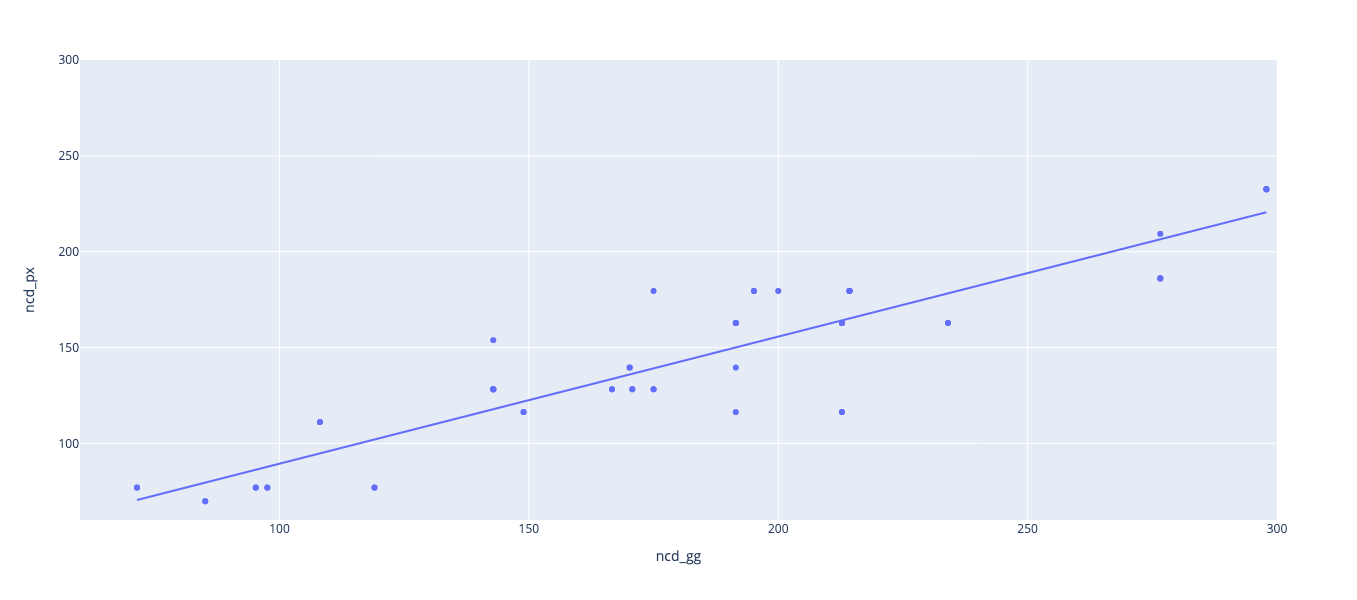

In [18]:
px.scatter(merged, x="ncd_gg", y="ncd_px", trendline="ols", 
           hover_data=merged.columns, width=600, height=600,
           range_x=[60, 300], range_y=[60, 300]
          )

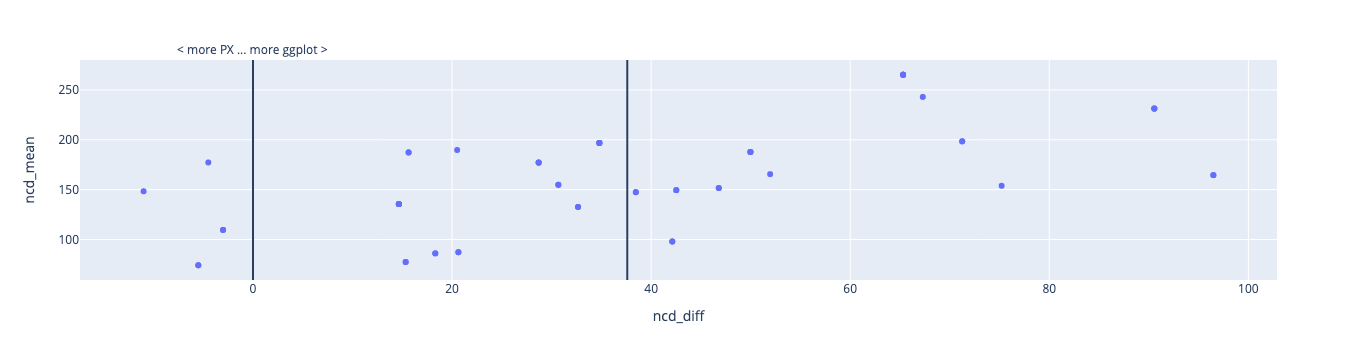

In [21]:
px.scatter(merged, y="ncd_mean", x="ncd_diff",
           hover_data=merged.columns
          ).add_vline(x=0, annotation_text="< more PX ... more ggplot >", annotation_position="top").add_vline(
    x=merged.ncd_diff.mean())